# Análisis exploratorio de datos
---

- **Autores**: Amalia Martín y Carlos Toro

## Objetivos

El objetivo del EDA es entender cómo se comportan los datos con los que vamos a trabajar. Buscamos comprender la estructura, las características principales y los patrones presentes en un conjunto de datos. Realizaremos un análisis para poder identificar tendencias, valores atípicos, relaciones entre variables y posibles errores en los datos, lo que nos permitirá tomar decisiones mucho más coherentes para la aplicación de los modelos requeridos.


## Importamos las librerías

In [1]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


## Carga y procesamiento de datos

In [2]:
PATH_DIRECTORIO_DATOS = "../data"
PATH_DATASET_HOTEL = f"{PATH_DIRECTORIO_DATOS}/dataset_practica_final.csv"

Cargamos los datos

In [3]:
df_hotel = pd.read_csv(PATH_DATASET_HOTEL)

### Inspección de los datos

Y presentamos una muestra de los mismos

In [4]:
# Cargamos los datos
print("Estos son los datos cargados:")


Estos son los datos cargados:


In [5]:
# primeros 5 registros
display(df_hotel.head(5))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# últimos 5 registros
display(df_hotel.tail(5))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Miramos la dimensión de los datos cargados

In [7]:
display(df_hotel.shape)
print(f"Dataset shape: {df_hotel.shape[0]} filas x {df_hotel.shape[1]} columnas\n")

(119390, 32)

Dataset shape: 119390 filas x 32 columnas



Y el nombre de las columnas y su tipo de datos:

In [8]:
print("Información del DataFrame:")
display(df_hotel.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  in

None

### Procesamiento de los datos

Al tener tantas columnas, buscamos reducir el número explorando las mismas.

In [9]:
df_hotel_preprocessed = df_hotel.copy()

Miramos si hay datos duplicados y los eliminamos

In [10]:
print(f"Número de filas duplicadas: {len(df_hotel_preprocessed[df_hotel_preprocessed.duplicated()])}")
df_hotel_preprocessed.drop_duplicates(inplace=True)
print(f"Número de filas después de eliminar: {len(df_hotel_preprocessed)}\n")

Número de filas duplicadas: 31994
Número de filas después de eliminar: 87396



Eliminamos las columnas con gran proporción de valores nulos

In [11]:
# eliminamos las columnas que tienen más del 50% de nulos
nulos = df_hotel_preprocessed.isna().sum()
columnas_a_eliminar = nulos[nulos > (df_hotel_preprocessed.shape[0] * 0.5)].index
if len(columnas_a_eliminar) > 0:
    print(f"Eliminamos las siguientes columnas con más de un 50% de nulos: {columnas_a_eliminar.tolist()}")
    df_hotel_preprocessed = df_hotel_preprocessed.drop(columns=columnas_a_eliminar)

Eliminamos las siguientes columnas con más de un 50% de nulos: ['company']


Revisamos cuántos nulos hay:

In [12]:
#traemos los valores nulos de cada variable
valores_nulos = df_hotel_preprocessed.isnull().sum()
if valores_nulos.sum() == 0:
    print("No hay valores nulos en el DataFrame.")
else:
    print("\nValores nulos por columna:")
    print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
children        4
country       452
agent       12193
dtype: int64


Debemos sustituir estos valores nulos para que no den error en los modelos de regresión logística.

Al ser pocos nulos y en una variable que contabiliza el número de hijos, parece lógico rellenar los valores faltantes con ceros.

In [13]:
df_hotel_preprocessed['children'] = df_hotel_preprocessed['children'].fillna(0)

Y revisamos que hayan desaparecido todos:

In [14]:
#traemos los valores nulos de cada variable
valores_nulos = df_hotel_preprocessed.isnull().sum()
if valores_nulos.sum() == 0:
    print("\nTodos los valores nulos han sido eliminados o rellenados.")
else:
    print("\nAún quedan valores nulos en las siguientes columnas:")
    print(valores_nulos[valores_nulos > 0])


Aún quedan valores nulos en las siguientes columnas:
country      452
agent      12193
dtype: int64


Eliminamos las columnas con un único valor único (si las hubiera)

In [15]:
# Columnas con un solo valor único
unicos = df_hotel_preprocessed.nunique()
columnas_a_eliminar = unicos[unicos == 1].index
if len(columnas_a_eliminar) > 0:
    print(f"Eliminamos las siguientes columnas con un único valor: {columnas_a_eliminar.tolist()}")
    df_hotel_preprocessed = df_hotel_preprocessed.drop(columns=columnas_a_eliminar)

Además, eliminamos las siguientes columnas por no aportar ningún valor al estudio:

In [16]:
df_hotel_preprocessed = df_hotel_preprocessed.drop(columns=['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights','meal','country','market_segment','distribution_channel','agent','required_car_parking_spaces','reservation_status','reservation_status_date'])

### Analizamos la variable dependiente

Seleccionamos cuál es la variable que queremos predecir

In [17]:
# Almacenamos la variable target
target_column = 'is_canceled'
df_hotel_preprocessed[target_column] = df_hotel_preprocessed[target_column].astype(str)
print(f"Variable target: {target_column}")
print(f"Valores únicos de la variable target: {df_hotel_preprocessed[target_column].unique()}\n")

Variable target: is_canceled
Valores únicos de la variable target: ['0' '1']



Calculamos el porcentaje de cancelaciones respecto al total

In [18]:
# proporción de cancelaciones respecto al total de reservas
cancelaciones = df_hotel_preprocessed[df_hotel_preprocessed[target_column] == "1"].shape[0]
total_reservas = df_hotel_preprocessed.shape[0]
print(f"Proporción de cancelaciones respecto al total de reservas: {cancelaciones / total_reservas:.2%}")

Proporción de cancelaciones respecto al total de reservas: 27.49%


Y graficamos el conteo de cancelaciones y no cancelaciones totales

<Axes: title={'center': 'Distribución de la variable target (is_canceled)'}, xlabel='is_canceled', ylabel='Count'>

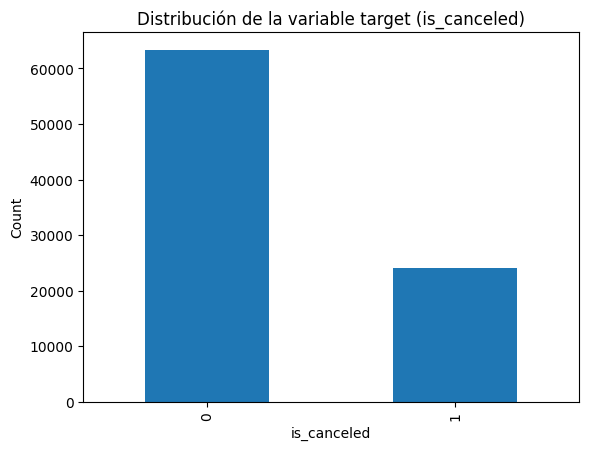

In [19]:
df_hotel_preprocessed[target_column].value_counts().plot(kind='bar', title=f'Distribución de la variable target ({target_column})', xlabel=target_column, ylabel='Count')

### Distribución de las columnas presentes

Categorizamos las columnas en función de su tipo de datos

In [20]:
#identificamos las columnas categóricas
categorical_columns = df_hotel_preprocessed.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove(target_column)  # eliminamos la variable target de las categóricas
# identificamos las columnas numéricas quitando las binarias y categóricas
binary_columns = [col for col in df_hotel_preprocessed.columns if df_hotel_preprocessed[col].nunique() == 2 and col != target_column]
print(f"Columnas binarias: {binary_columns}\n")
numerical_columns = df_hotel_preprocessed.select_dtypes(include=['number']).columns.tolist()
# eliminamos también las columnas que estén en las listas de categorías anteriores
numerical_columns = [col for col in numerical_columns if col not in binary_columns and col != target_column]
print(f"Columnas numéricas: {numerical_columns}\n")

Columnas binarias: ['is_repeated_guest']

Columnas numéricas: ['lead_time', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'total_of_special_requests']



Exploramos la distribución de nuestras columnas:

In [21]:
display(df_hotel_preprocessed.describe().T)

,count,mean,std,min,25%,50%,75%,max
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87396.0,0.138633,0.455871,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0
is_repeated_guest,87396.0,0.039075,0.193775,0.00,0.0,0.0,0.0,1.0
previous_cancellations,87396.0,0.030413,0.369145,0.00,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,87396.0,0.183990,1.731894,0.00,0.0,0.0,0.0,72.0
booking_changes,87396.0,0.271603,0.727245,0.00,0.0,0.0,0.0,21.0
days_in_waiting_list,87396.0,0.749565,10.015731,0.00,0.0,0.0,0.0,391.0


Identificamos los valores atípicos.

Identificamos los outliers usando el rango intercuartílico (IQR) en las columnas numéricas. Para cada columna calcula los límites inferior y superior e identifica los registros que están fuera de esos límites.


In [22]:
# identificamos los outliers en las columnas numéricas
outliers = {}
for col in numerical_columns:
    q1 = df_hotel_preprocessed[col].quantile(0.01)
    q3 = df_hotel_preprocessed[col].quantile(0.99)

    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df_hotel_preprocessed[(df_hotel_preprocessed[col] < lower_bound) | (df_hotel_preprocessed[col] > upper_bound)]

In [23]:
# imprimimos el conteo de outliers por columna
for col, outlier_df in outliers.items():
    print(f"Columna: {col}, Número de outliers: {len(outlier_df)}")
    #eliminamos los outliers del DataFrame
    df_hotel_preprocessed = df_hotel_preprocessed[~df_hotel_preprocessed[col].isin(outlier_df[col])]

Columna: lead_time, Número de outliers: 0
Columna: stays_in_week_nights, Número de outliers: 15
Columna: adults, Número de outliers: 13
Columna: children, Número de outliers: 1
Columna: babies, Número de outliers: 2
Columna: previous_cancellations, Número de outliers: 166
Columna: previous_bookings_not_canceled, Número de outliers: 282
Columna: booking_changes, Número de outliers: 55
Columna: days_in_waiting_list, Número de outliers: 860
Columna: adr, Número de outliers: 1
Columna: total_of_special_requests, Número de outliers: 0


Mostramos el conteo de las columnas binarias

<Axes: title={'center': 'Distribución de la variable target (is_repeated_guest)'}, xlabel='is_repeated_guest', ylabel='Count'>

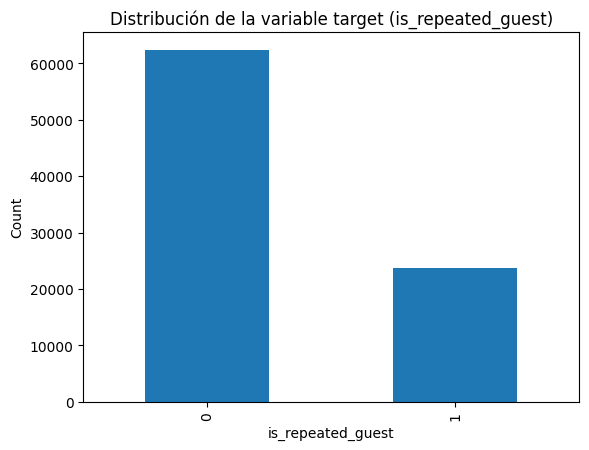

In [24]:
df_hotel_preprocessed[target_column].value_counts().plot(kind='bar', title=f'Distribución de la variable target ({binary_columns[0]})', xlabel=binary_columns[0], ylabel='Count')

Mostramos la distribución de las columnas numéricas

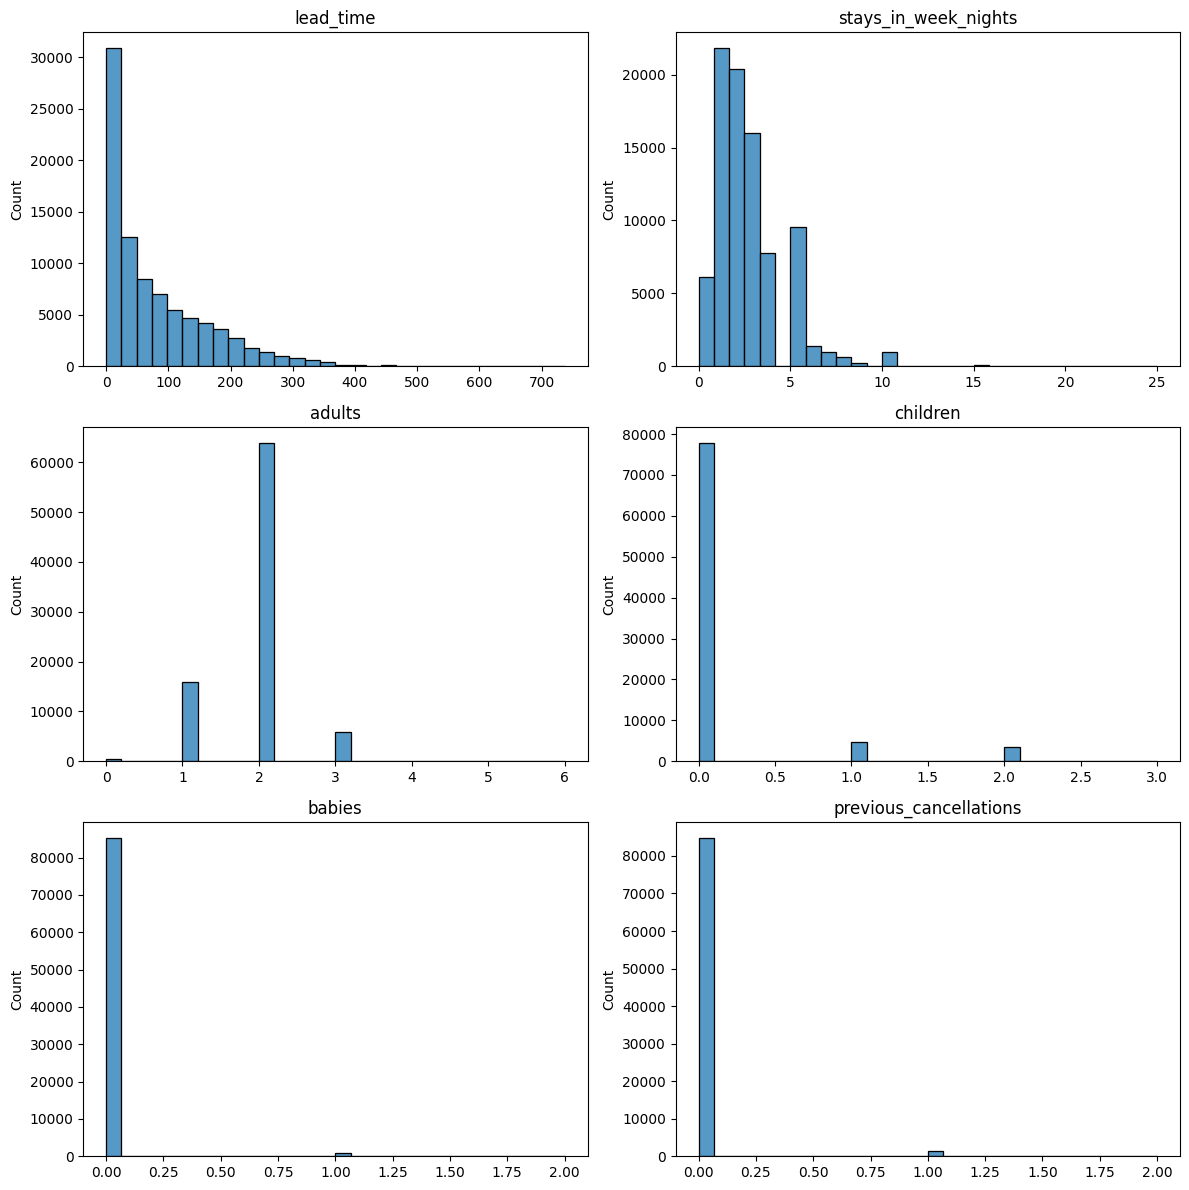

In [25]:
# Creamos un grid 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, col in zip(axes, numerical_columns):
    sns.histplot(df_hotel_preprocessed[col], ax=ax, bins=30, kde=False)
    ax.set_title(col)
    ax.set_xlabel("")

plt.tight_layout()
plt.show()


Presentamos el boxplot de las variables numéricasm

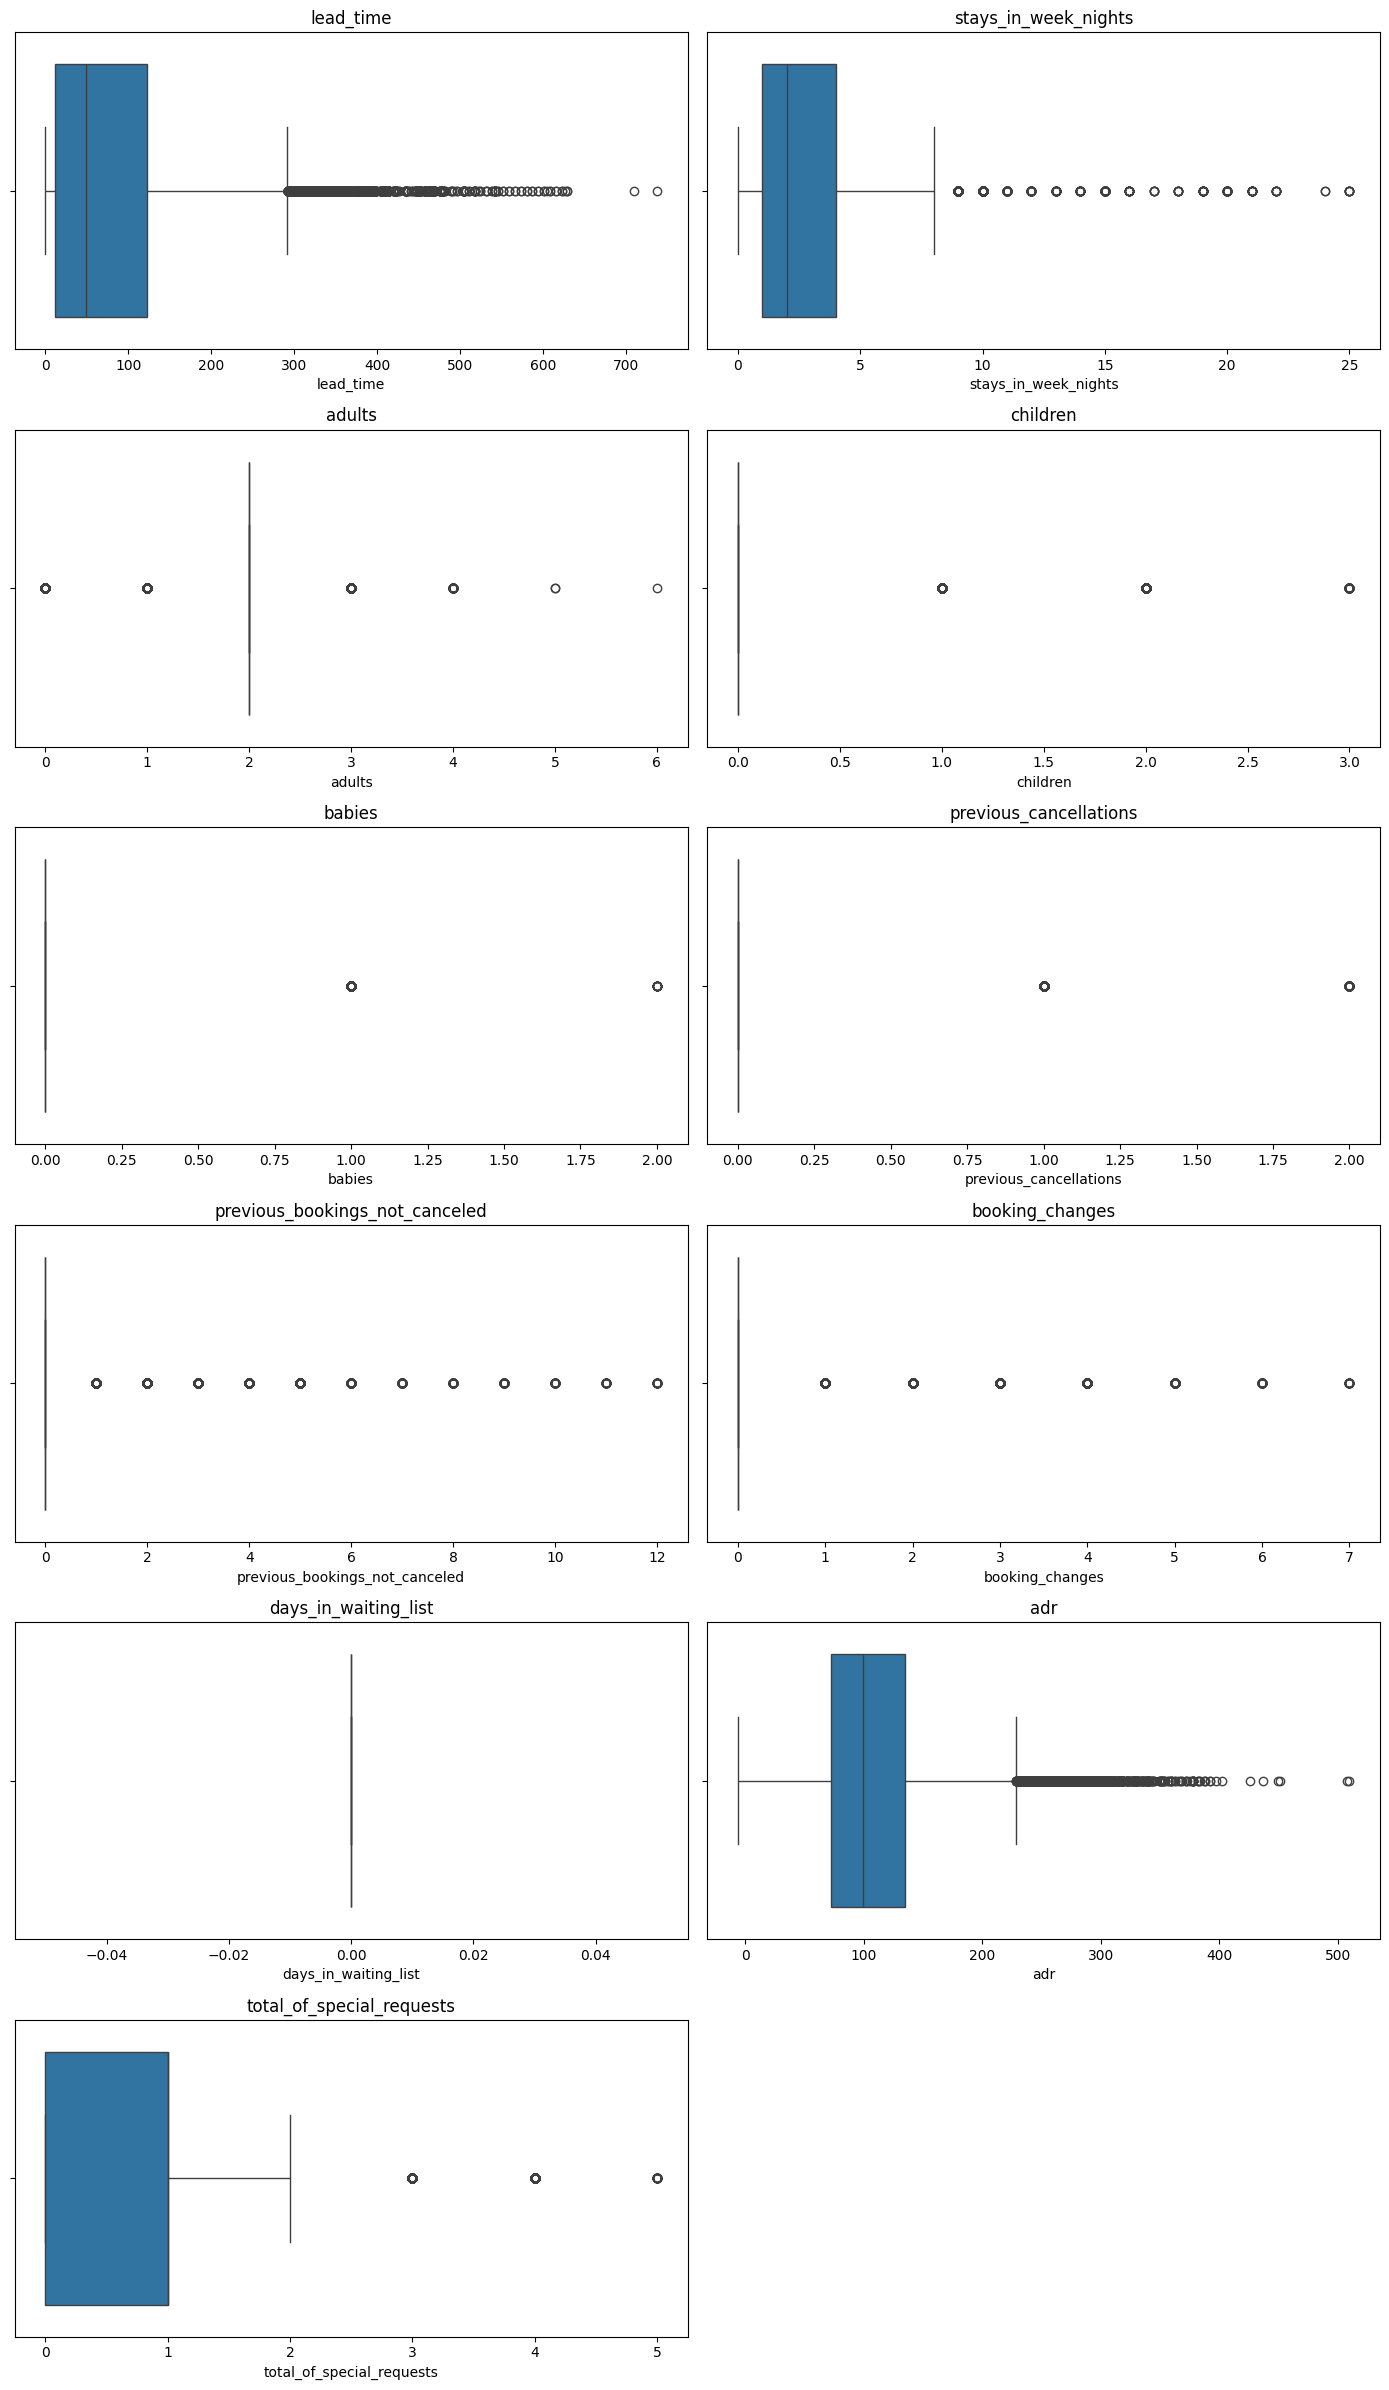

In [26]:
fig, axes = plt.subplots(6, 2, figsize=(14, 24))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_hotel_preprocessed[col], ax=axes[i])
    axes[i].set_title(col)

# Elimina el subplot vacío si hay más subplots que columnas numéricas
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Presentamos el conteo de cada valor único en las columnas categóricas

In [27]:
#Presentamos el conteo de cada valor único en las columnas categóricas
for col in categorical_columns:
    print(f"Columna: {col}")
    display(df_hotel_preprocessed[col].value_counts())
    print("\n")


Columna: reserved_room_type


reserved_room_type
A    55436
D    17315
E     5996
F     2811
G     2039
B      995
C      910
H      596
L        6
P        6
Name: count, dtype: int64



Columna: assigned_room_type


assigned_room_type
A    45449
D    22252
E     7112
F     3595
G     2477
C     2139
B     1768
H      706
I      343
K      262
P        6
L        1
Name: count, dtype: int64



Columna: deposit_type


deposit_type
No Deposit    85193
Non Refund      816
Refundable      101
Name: count, dtype: int64



Columna: customer_type


customer_type
Transient          71403
Transient-Party    11047
Contract            3135
Group                525
Name: count, dtype: int64

Y lo graficamos:

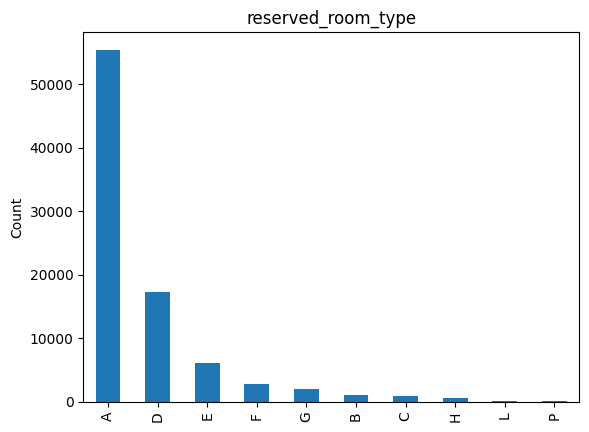

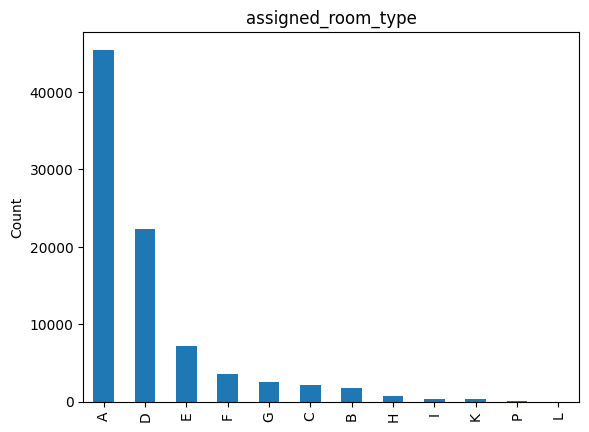

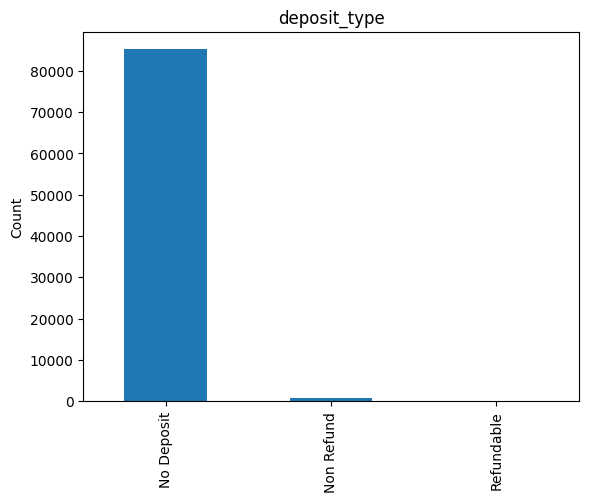

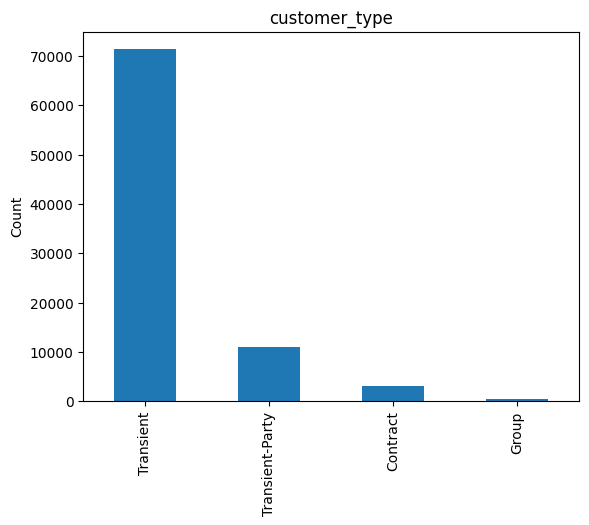

In [28]:
for col in categorical_columns:
    df_hotel_preprocessed[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Count")
    plt.show()


### Matriz de correlación de las variables

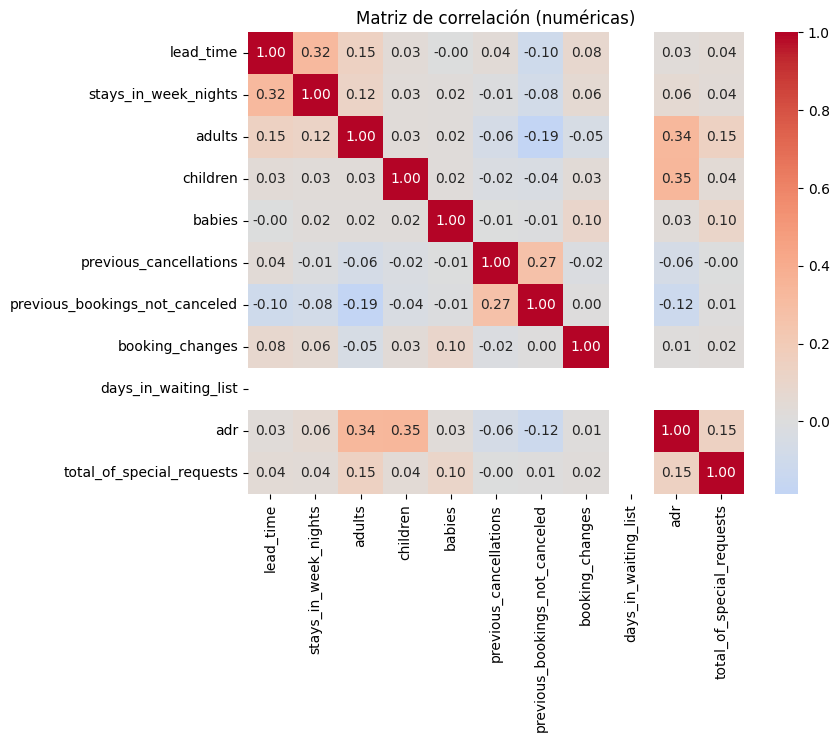

In [29]:
# Correlación entre variables numéricas
corr = df_hotel_preprocessed[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación (numéricas)")
plt.show()

### Guardamos los datos procesados para cargarlos posteriormente

In [30]:
# guardamos los datos en un csv
df_hotel_preprocessed.to_csv(f"{PATH_DIRECTORIO_DATOS}/dataset_hotel_preprocessed.csv", index=False)